In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, accuracy_score, 
                             confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
import itertools
import pickle
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
from yellowbrick.features import ParallelCoordinates
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from yellowbrick.features import Rank1D,Rank2D
from yellowbrick.classifier import ClassBalance
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from sklearn.model_selection import StratifiedShuffleSplit
from yellowbrick.classifier import ClassPredictionError, ClassificationReport
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from matplotlib import gridspec

from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Using TensorFlow backend.


In [2]:
#import data
df = pd.read_csv("train.csv")
df_resources = pd.read_csv("resources.csv")

In [3]:
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [4]:
df_resources.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [5]:
df_resources.shape

(1541272, 4)

In [6]:
df_resources.describe()

,quantity,price
count,1.541272e+06,1.541272e+06
mean,2.860509e+00,5.028398e+01
std,7.570345e+00,1.447326e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.900000e+00
50%,1.000000e+00,1.499000e+01
75%,2.000000e+00,3.980000e+01
max,8.000000e+02,9.999000e+03


In [7]:
#groupby submission id to get total price and total quantity of items being requested
view1 = df_resources.groupby(['id'])[('price','quantity')].sum()

In [8]:
view1.head()

,price,quantity
id,,
p000001,459.56,7
p000002,515.89,21
p000003,298.97,4
p000004,1113.69,98
p000005,485.99,8


In [9]:
view2 = view1.reset_index()

In [10]:
df.shape

(182080, 16)

In [11]:
df.describe()

,teacher_number_of_previously_posted_projects,project_is_approved
count,182080.000000,182080.000000
mean,11.237055,0.847682
std,28.016086,0.359330
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,1.000000
75%,9.000000,1.000000
max,451.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [13]:
# total number of missing values - no missing values
np.count_nonzero(df.isnull())

351416

In [14]:
#Strip any spaces in column names
df.columns = df.columns.map(str.strip)
df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [15]:
#Strip any spaces in column names
view1.columns = view1.columns.map(str.strip)
view1.columns

Index(['price', 'quantity'], dtype='object')

In [16]:
view1.head()

,price,quantity
id,,
p000001,459.56,7
p000002,515.89,21
p000003,298.97,4
p000004,1113.69,98
p000005,485.99,8


In [17]:
#merge train and resources dataframe
df2 = pd.merge(df,view2[['id','price','quantity']],on='id', how='left')

In [18]:
df2.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,299.98,6
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20.00,20
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47,5
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,355.50,2


In [19]:
#get average price per quanitity of items requested
df2['Avg_Price_Per_Quantity'] = (df2['price']/df2['quantity']).round(2)

In [20]:
df2.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,Avg_Price_Per_Quantity
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,299.98,6,50.00
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20.00,20,1.00
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99,1,469.99
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47,5,136.89
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,355.50,2,177.75


In [21]:
df2 = df2.set_index('project_is_approved').reset_index()

In [22]:
#Visualize Class Balance
target_count = df2.project_is_approved.value_counts()

In [23]:
# print class balance
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print(f'Percentage of Majority Class: {round(target_count[1] / sum(target_count), 4)*100}')

Class 0: 27734
Class 1: 154346
Proportion: 0.18 : 1
Percentage of Majority Class: 84.77


In [24]:
#split data into target and independent variables to graph class balance
X, y = df2.drop('project_is_approved',axis=1), df2['project_is_approved']

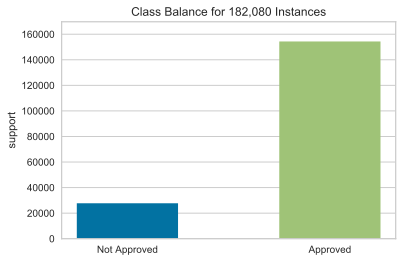

In [25]:
from yellowbrick.target import ClassBalance
# Instantiate the visualizer
viz = ClassBalance(labels=["Not Approved", "Approved"])

viz.fit(y)        # Fit the data to the visualizer
viz.show(outpath="classimbalance.svg")

In [26]:
#get dummy variables for object columns
df_dummies = pd.get_dummies(df2, columns = ['teacher_prefix', 'project_grade_category'], drop_first = True)

In [27]:
df_dummies.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,Avg_Price_Per_Quantity,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00,0,0,1,0,0,0,1
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00,0,1,0,0,0,0,0
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99,0,0,1,0,0,0,0
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89,1,0,0,0,0,0,0
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75,1,0,0,0,1,0,0


In [28]:
  regions = {
    'ME':'NORTHEAST',
    'NH': 'NORTHEAST',
    'VT': 'NORTHEAST',
    'MA': 'NORTHEAST',
    'RI': 'NORTHEAST',
    'CT': 'NORTHEAST',
    'NY': 'NORTHEAST',
    'PA': 'NORTHEAST',
    'NJ': 'NORTHEAST',  
    'WI': 'MIDWEST',
    'MI': 'MIDWEST', 
    'IL': 'MIDWEST', 
    'IN': 'MIDWEST',
    'OH': 'MIDWEST',
    'ND': 'MIDWEST',
    'SD': 'MIDWEST',
    'NE': 'MIDWEST',
    'KS': 'MIDWEST',
    'MN': 'MIDWEST',
    'IA': 'MIDWEST',
    'MO': 'MIDWEST',
    'DE': 'SOUTH',
    'MD': 'SOUTH',
    'DC': 'SOUTH',
    'VA': 'SOUTH',
    'WV': 'SOUTH',
    'NC': 'SOUTH',
    'SC': 'SOUTH',
    'GA': 'SOUTH',
    'FL': 'SOUTH',
    'KY': 'SOUTH',
    'TN': 'SOUTH',
    'MS': 'SOUTH',
    'AL': 'SOUTH',
    'OK': 'SOUTH',
    'TX': 'SOUTH',
    'AR': 'SOUTH',
    'LA': 'SOUTH',
    'ID': 'WEST',
    'MT': 'WEST',
    'WY': 'WEST',
    'NV': 'WEST',
    'UT': 'WEST',
    'CO': 'WEST',
    'AZ': 'WEST',
    'NM': 'WEST',
    'AK': 'WEST',
    'WA': 'WEST',
    'OR': 'WEST',
    'CA': 'WEST',
    'HI': 'WEST'}

In [29]:
def get_region(state):
    return regions[state]

df_dummies['Region'] = df_dummies['school_state'].apply(get_region)

In [30]:
df_dummies.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,Avg_Price_Per_Quantity,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2,Region
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00,0,0,1,0,0,0,1,WEST
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00,0,1,0,0,0,0,0,SOUTH
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99,0,0,1,0,0,0,0,WEST
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89,1,0,0,0,0,0,0,SOUTH
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75,1,0,0,0,1,0,0,WEST


In [31]:
df_dummies = pd.get_dummies(df_dummies, columns = ['Region'], drop_first = True)

In [32]:
df_dummies.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,Avg_Price_Per_Quantity,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2,Region_NORTHEAST,Region_SOUTH,Region_WEST
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00,0,0,1,0,0,0,1,0,0,1
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00,0,1,0,0,0,0,0,0,1,0
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99,0,0,1,0,0,0,0,0,0,1
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89,1,0,0,0,0,0,0,0,1,0
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75,1,0,0,0,1,0,0,0,0,1


In [33]:
df_dummies['project_subject_categories_new'] = [x.split(',')[0] for x in df_dummies['project_subject_categories']]

In [34]:
df_dummies.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,Avg_Price_Per_Quantity,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2,Region_NORTHEAST,Region_SOUTH,Region_WEST,project_subject_categories_new
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00,0,0,1,0,0,0,1,0,0,1,Literacy & Language
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00,0,1,0,0,0,0,0,0,1,0,Music & The Arts
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99,0,0,1,0,0,0,0,0,0,1,Math & Science
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89,1,0,0,0,0,0,0,0,1,0,Health & Sports
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75,1,0,0,0,1,0,0,0,0,1,Health & Sports


In [35]:
df_dummies.project_subject_categories_new.unique()

array(['Literacy & Language', 'Music & The Arts', 'Math & Science',
       'Health & Sports', 'Applied Learning', 'Special Needs',
       'History & Civics', 'Warmth'], dtype=object)

In [36]:
df_dummies = pd.get_dummies(df_dummies, columns = ['project_subject_categories_new'], drop_first = True)

In [37]:
df_dummies.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,Avg_Price_Per_Quantity,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2,Region_NORTHEAST,Region_SOUTH,Region_WEST,project_subject_categories_new_Health & Sports,project_subject_categories_new_History & Civics,project_subject_categories_new_Literacy & Language,project_subject_categories_new_Math & Science,project_subject_categories_new_Music & The Arts,project_subject_categories_new_Special Needs,project_subject_categories_new_Warmth
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0


In [38]:
#essay prompts changed after 5/17/16 - dropped submissions prior to this date for consistency
df_dummies.query("project_submitted_datetime  >= '2016-05-17'", inplace=True)

In [39]:
df_dummies.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,Avg_Price_Per_Quantity,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2,Region_NORTHEAST,Region_SOUTH,Region_WEST,project_subject_categories_new_Health & Sports,project_subject_categories_new_History & Civics,project_subject_categories_new_Literacy & Language,project_subject_categories_new_Math & Science,project_subject_categories_new_Music & The Arts,project_subject_categories_new_Special Needs,project_subject_categories_new_Warmth
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0


In [40]:
df2.head()

,project_is_approved,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,Avg_Price_Per_Quantity
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89
4,1,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75


In [41]:
df3 = pd.merge(df_dummies,df2[['id','price','quantity','Avg_Price_Per_Quantity','teacher_number_of_previously_posted_projects']],on='id', how='left')

In [42]:
df3.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects_x,price_x,quantity_x,Avg_Price_Per_Quantity_x,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2,Region_NORTHEAST,Region_SOUTH,Region_WEST,project_subject_categories_new_Health & Sports,project_subject_categories_new_History & Civics,project_subject_categories_new_Literacy & Language,project_subject_categories_new_Math & Science,project_subject_categories_new_Music & The Arts,project_subject_categories_new_Special Needs,project_subject_categories_new_Warmth,price_y,quantity_y,Avg_Price_Per_Quantity_y,teacher_number_of_previously_posted_projects_y
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,299.98,6,50.00,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,299.98,6,50.00,26
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,20.00,20,1.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,20.00,20,1.00,1
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,469.99,1,469.99,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,469.99,1,469.99,5
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,684.47,5,136.89,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,684.47,5,136.89,16
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,355.50,2,177.75,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,355.50,2,177.75,42


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175735 entries, 0 to 175734
Data columns (total 38 columns):
project_is_approved                                   175735 non-null int64
id                                                    175735 non-null object
teacher_id                                            175735 non-null object
school_state                                          175735 non-null object
project_submitted_datetime                            175735 non-null object
project_subject_categories                            175735 non-null object
project_subject_subcategories                         175735 non-null object
project_title                                         175735 non-null object
project_essay_1                                       175735 non-null object
project_essay_2                                       175735 non-null object
project_essay_3                                       29 non-null object
project_essay_4                                

In [44]:
df3.drop(['price_y','quantity_y','Avg_Price_Per_Quantity_y','teacher_number_of_previously_posted_projects_y','project_essay_3','project_essay_4'], axis = 1, inplace = True )

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175735 entries, 0 to 175734
Data columns (total 32 columns):
project_is_approved                                   175735 non-null int64
id                                                    175735 non-null object
teacher_id                                            175735 non-null object
school_state                                          175735 non-null object
project_submitted_datetime                            175735 non-null object
project_subject_categories                            175735 non-null object
project_subject_subcategories                         175735 non-null object
project_title                                         175735 non-null object
project_essay_1                                       175735 non-null object
project_essay_2                                       175735 non-null object
project_resource_summary                              175735 non-null object
teacher_number_of_previously_posted_project

In [46]:
df3.describe()

,project_is_approved,teacher_number_of_previously_posted_projects_x,price_x,quantity_x,Avg_Price_Per_Quantity_x,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2,Region_NORTHEAST,Region_SOUTH,Region_WEST,project_subject_categories_new_Health & Sports,project_subject_categories_new_History & Civics,project_subject_categories_new_Literacy & Language,project_subject_categories_new_Math & Science,project_subject_categories_new_Music & The Arts,project_subject_categories_new_Special Needs,project_subject_categories_new_Warmth
count,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000,175735.000000
mean,0.846860,11.325604,297.602119,16.919441,91.559874,0.096719,0.523794,0.357732,0.021601,0.154596,0.099787,0.406652,0.164179,0.396660,0.254485,0.121899,0.037887,0.415074,0.230381,0.048613,0.042547,0.012468
std,0.360123,28.148525,365.630468,26.122393,271.708320,0.295576,0.499435,0.479334,0.145376,0.361521,0.299716,0.491210,0.370439,0.489206,0.435573,0.327171,0.190923,0.492736,0.421078,0.215058,0.201834,0.110961
min,0.000000,0.000000,0.660000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,104.680000,4.000000,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,205.860000,9.000000,23.310000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,379.080000,21.000000,75.870000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,451.000000,9999.000000,930.000000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
view2 = df3.groupby(['teacher_id'])['teacher_number_of_previously_posted_projects_x'].max().sort_values(ascending=False)
view2.head(20)

teacher_id
fa2f220b537e8653fb48878ebb38044d    451
02bccf5c109ace4f3dcbce819a46daa1    391
a006826c170f91f85ff80dc5a132fade    387
9d7051e2611cebdb758f1c7bd09360ac    354
9f49ba20aa1c28eb95dbad8b8edd2b69    354
8b0223c947a15bb06a643609cd9adf4b    323
1f64dcec848be8e95c4482cc845706b2    323
cd7400347f6c17ca9c1fdb5adbecbbac    314
1ca7b89d01fdbf724c34ed6409a45583    285
470d53ad448aeaa64b4cc4328e87ab45    284
36bb2e14284855ae71add017d163c85e    273
d5569717b239f873762a913b79416d12    272
3e4fe26684efc5811ed8184b035130a6    268
799eea5994ef0e9d27bec44f2df09f41    248
8571ffc62f169376f17fd43d274b50db    240
484afe9fb410490f74de8f51e5308de0    238
5f66077740964356d0b343e9451baa17    235
cba839f072ed865f31b9b801322b8ee7    234
11e75991e5e0245db57a72c0ea7519c5    233
d13b0282e3fd580b3e9da27ccfae8933    231
Name: teacher_number_of_previously_posted_projects_x, dtype: int64

In [48]:
df3.to_pickle("./dummy.pkl")